# Business Understabnding
We will go through and analyze the data if both boston and seattle 
To answer the following questions:
- How will an airbnb host choose the right property type?
- How can a tenant capitalize on this information?
- What are the major differences between Seattle and Boston?

## Importing required Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [3]:
listings_data_seattle = pd.read_csv('./seattleairbnb/listings.csv')
calender_data_seattle = pd.read_csv('./seattleairbnb/calendar.csv')
reviews_data_seattle = pd.read_csv('./seattleairbnb/reviews.csv')

listings_data_boston = pd.read_csv('./bostonairbnb/listings.csv')
calender_data_boston = pd.read_csv('./bostonairbnb/calendar.csv')
reviews_data_boston = pd.read_csv('./bostonairbnb/reviews.csv')


# Data Understanding

In [4]:
#Finding if all columns are the same in both datasets
def compare_datasets():
    """
    Compare the columns of the datasets to see if they are the same

    Returns:
    Void: Prints out if the columns are the same in both datasets
    """
    if(listings_data_seattle.columns.all() == listings_data_boston.columns.all()):
        print("Listings dataa Columns are the same in both datasets")
    if(calender_data_seattle.columns.all() == calender_data_boston.columns.all()):
        print("Calender data Columns are the same in both datasets")
    if(reviews_data_seattle.columns.all() == reviews_data_boston.columns.all()):
        print("Reviews data Columns are the same in both datasets")

compare_datasets()

Listings dataa Columns are the same in both datasets
Calender data Columns are the same in both datasets
Reviews data Columns are the same in both datasets


In [5]:
listings_data_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [6]:
calender_data_seattle

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [7]:
reviews_data_seattle.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [8]:
def plot_correlation_map(df):
    """
    Plot a correlation heatmap for the given DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical data.

    Returns:
    None

    This function calculates the correlation matrix of the DataFrame's numerical columns
    and plots a heatmap to visualize the correlations between them. The heatmap colors
    represent the strength and direction of linear relationships: positive values indicate
    positive correlations, negative values indicate negative correlations, and values near
    zero indicate weak or no correlation.
    """
    
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 30 , 30 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 },
        fmt = '.2f'
    )

    
def remove_columns_with_high_null(df, threshold=0.75):
    """
    Remove columns from DataFrame where more than threshold percentage of values are null.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        threshold (float): Threshold percentage of null values. Default is 0.75 (75%).
        
    Returns:
        DataFrame: DataFrame with columns removed if they have more than threshold percentage of null values.
    """
    # Calculate the percentage of null values in each column
    null_percentage = df.isnull().mean()
    
    # Filter out columns where the percentage exceeds the threshold
    columns_to_remove = null_percentage[null_percentage > threshold].index
    
    # Drop the columns from the DataFrame
    df_filtered = df.drop(columns=columns_to_remove)
    
    return df_filtered , columns_to_remove

# Data Preparation

### Taking a look at null percentages

In [9]:
listings_data_seattle[listings_data_seattle.select_dtypes(include=['float64', 'int64', 'bool']).columns].isnull().mean().sort_values(ascending=False).head(10)

license                        1.000000
square_feet                    0.974594
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
reviews_per_month              0.164222
dtype: float64

In [10]:
listings_data_boston[listings_data_boston.select_dtypes(include=['float64', 'int64', 'bool']).columns].isnull().mean().sort_values(ascending=False).head(10)

has_availability                1.000000
jurisdiction_names              1.000000
license                         1.000000
neighbourhood_group_cleansed    1.000000
square_feet                     0.984379
review_scores_accuracy          0.229568
review_scores_location          0.229289
review_scores_value             0.229010
review_scores_checkin           0.228731
review_scores_communication     0.228173
dtype: float64

In [11]:
print(calender_data_seattle[calender_data_seattle['available']=='t'].isnull().mean())
print('Available with null price: ', calender_data_seattle['available'].isnull().mean())

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64
Available with null price:  0.0


In [12]:
print(calender_data_boston[calender_data_boston['available']=='t'].isnull().mean())
print('Available with null price: ', calender_data_boston['available'].isnull().mean())

listing_id    0.0
date          0.0
available     0.0
price         0.0
dtype: float64
Available with null price:  0.0


In [13]:
# Remove columns with more than 46% null values
listings_data_seattle, columns_removed_seattle = remove_columns_with_high_null(listings_data_seattle, threshold=0.46)
listings_data_boston, columns_removed_boston = remove_columns_with_high_null(listings_data_boston, threshold=0.46)
print(f"Columns removed from Seattle listings data: {columns_removed_seattle}"
      f"\nColumns removed from Boston listings data: {columns_removed_boston}")





Columns removed from Seattle listings data: Index(['square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'license'],
      dtype='object')
Columns removed from Boston listings data: Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')


### Making Price Columns floats by removing symbols and converting them to float

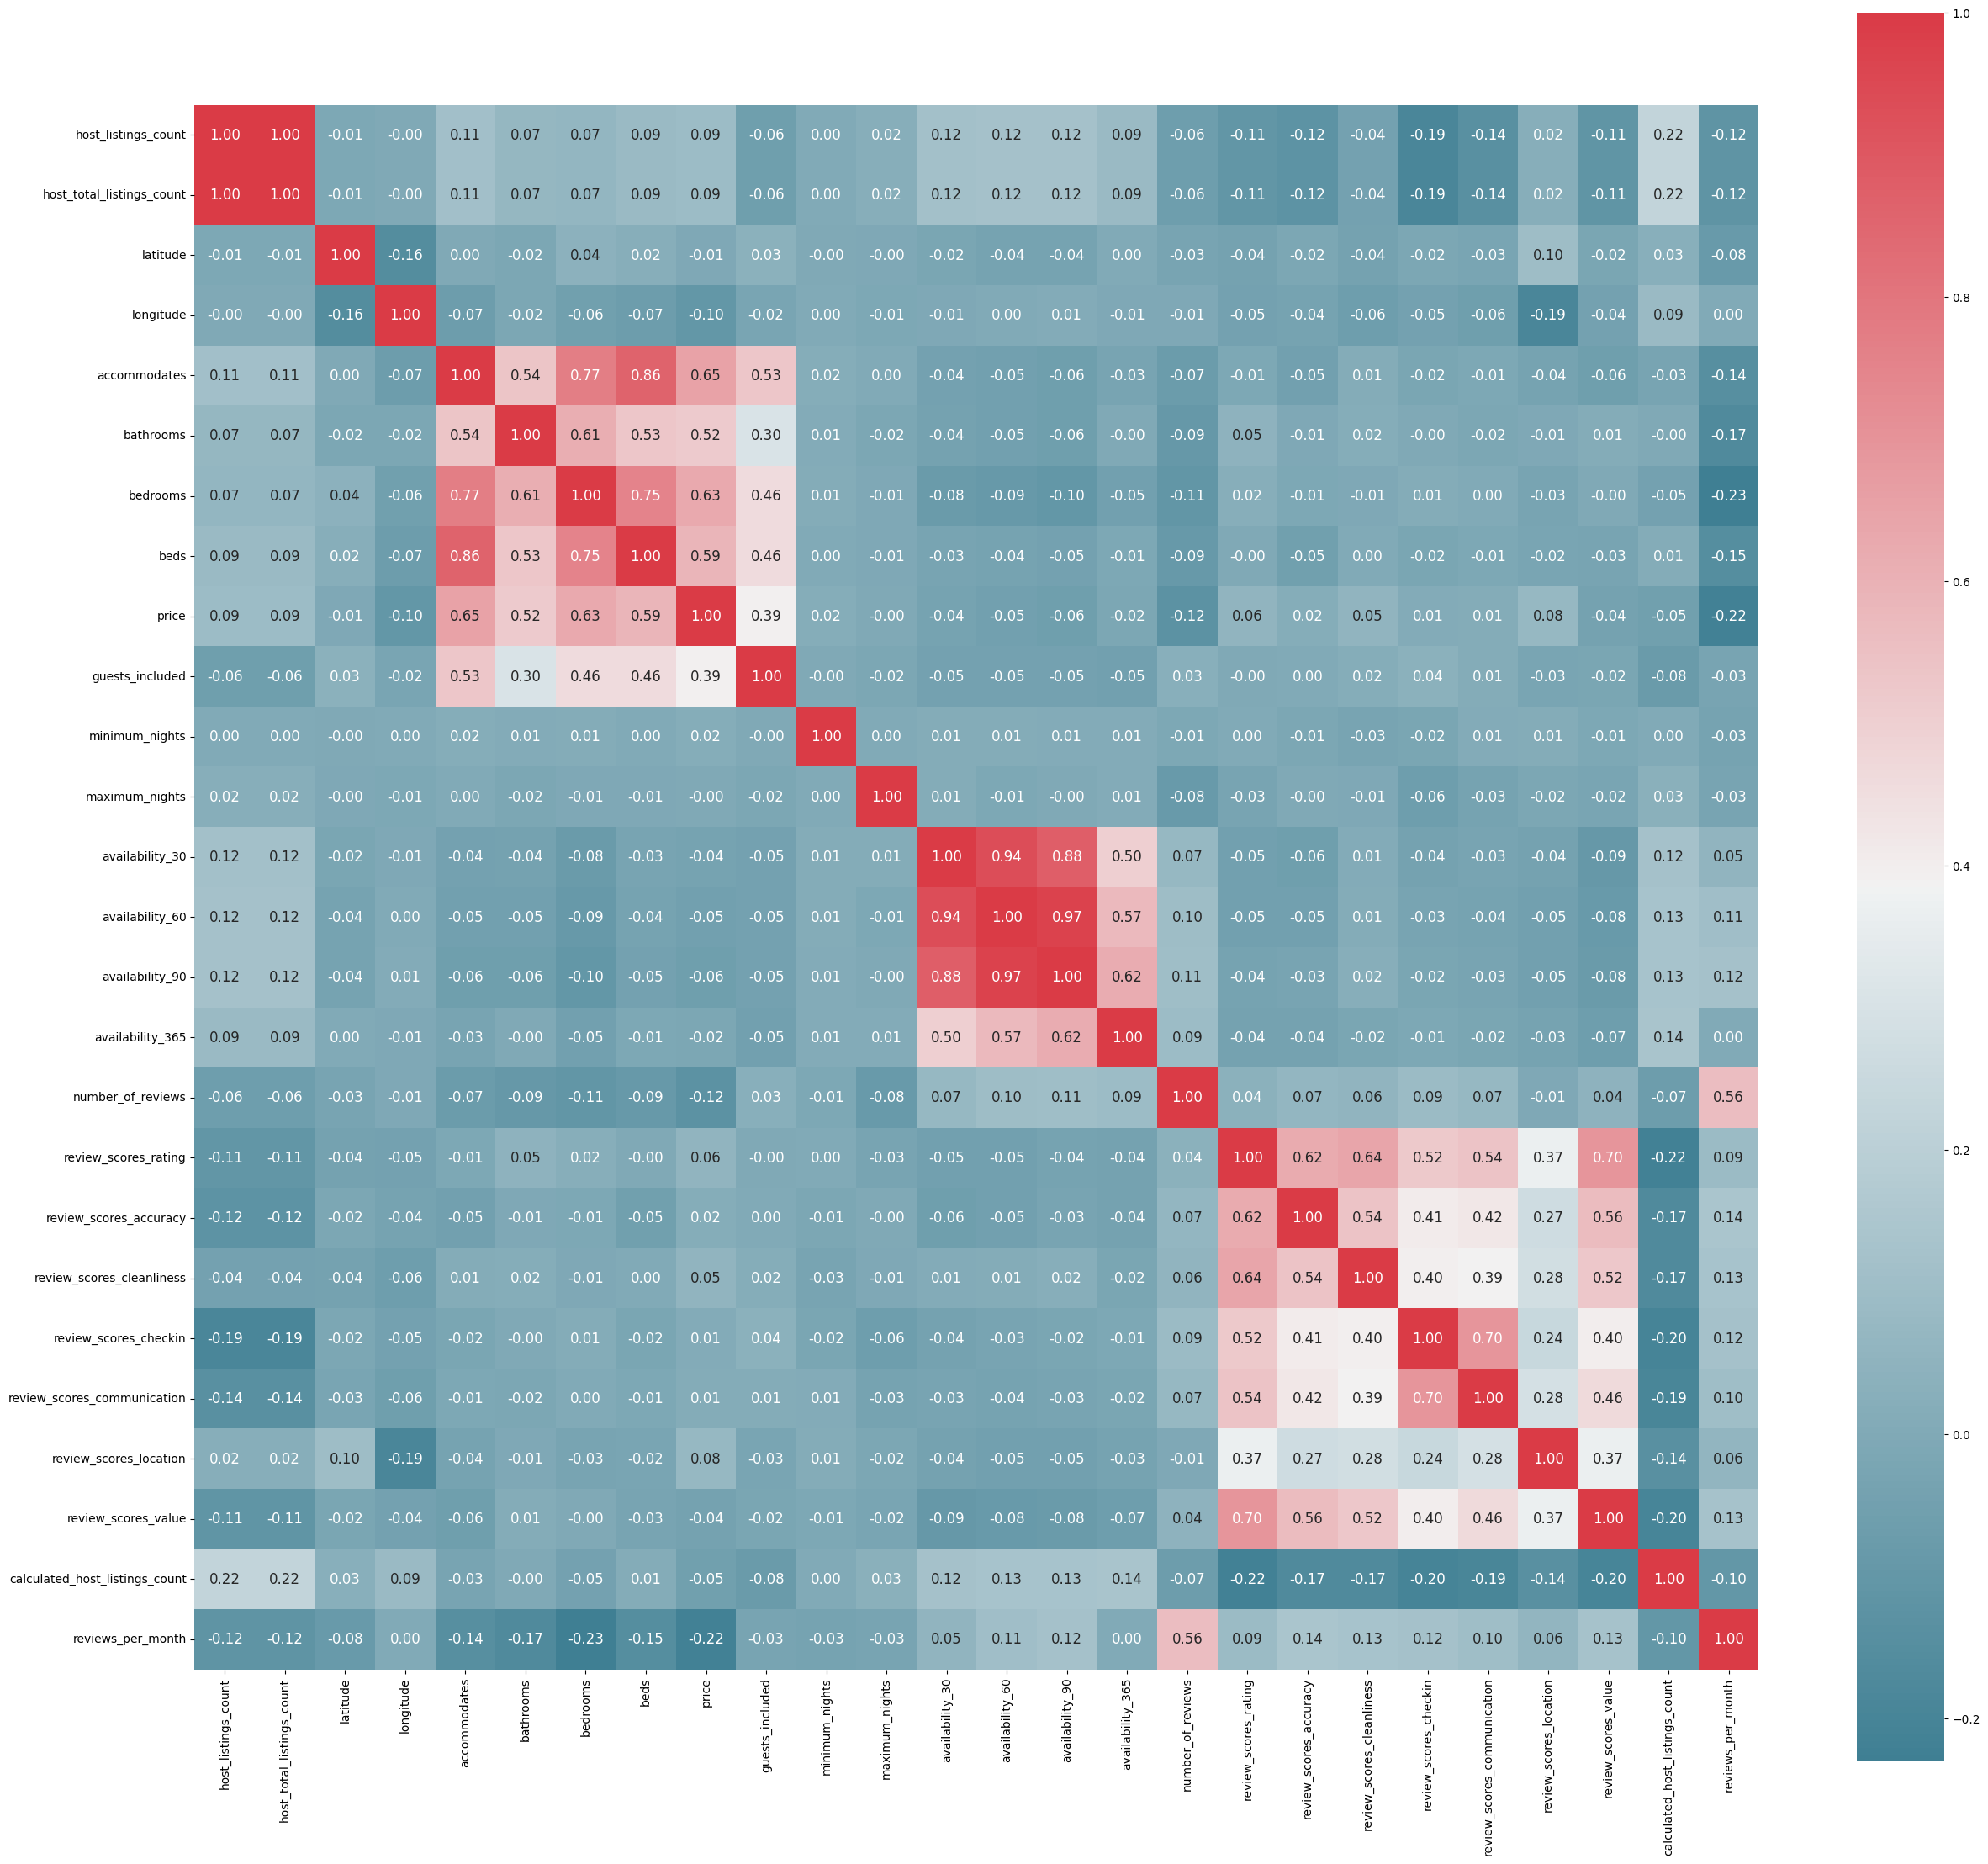

In [14]:
listings_data_seattle[['price']] = listings_data_seattle[['price']].replace('[\$,]', '', regex=True).astype(float)
plot_correlation_map(listings_data_seattle[listings_data_seattle.select_dtypes(include=['float64', 'int64', 'bool']).columns].drop(['id', 'scrape_id', 'host_id'], axis=1))

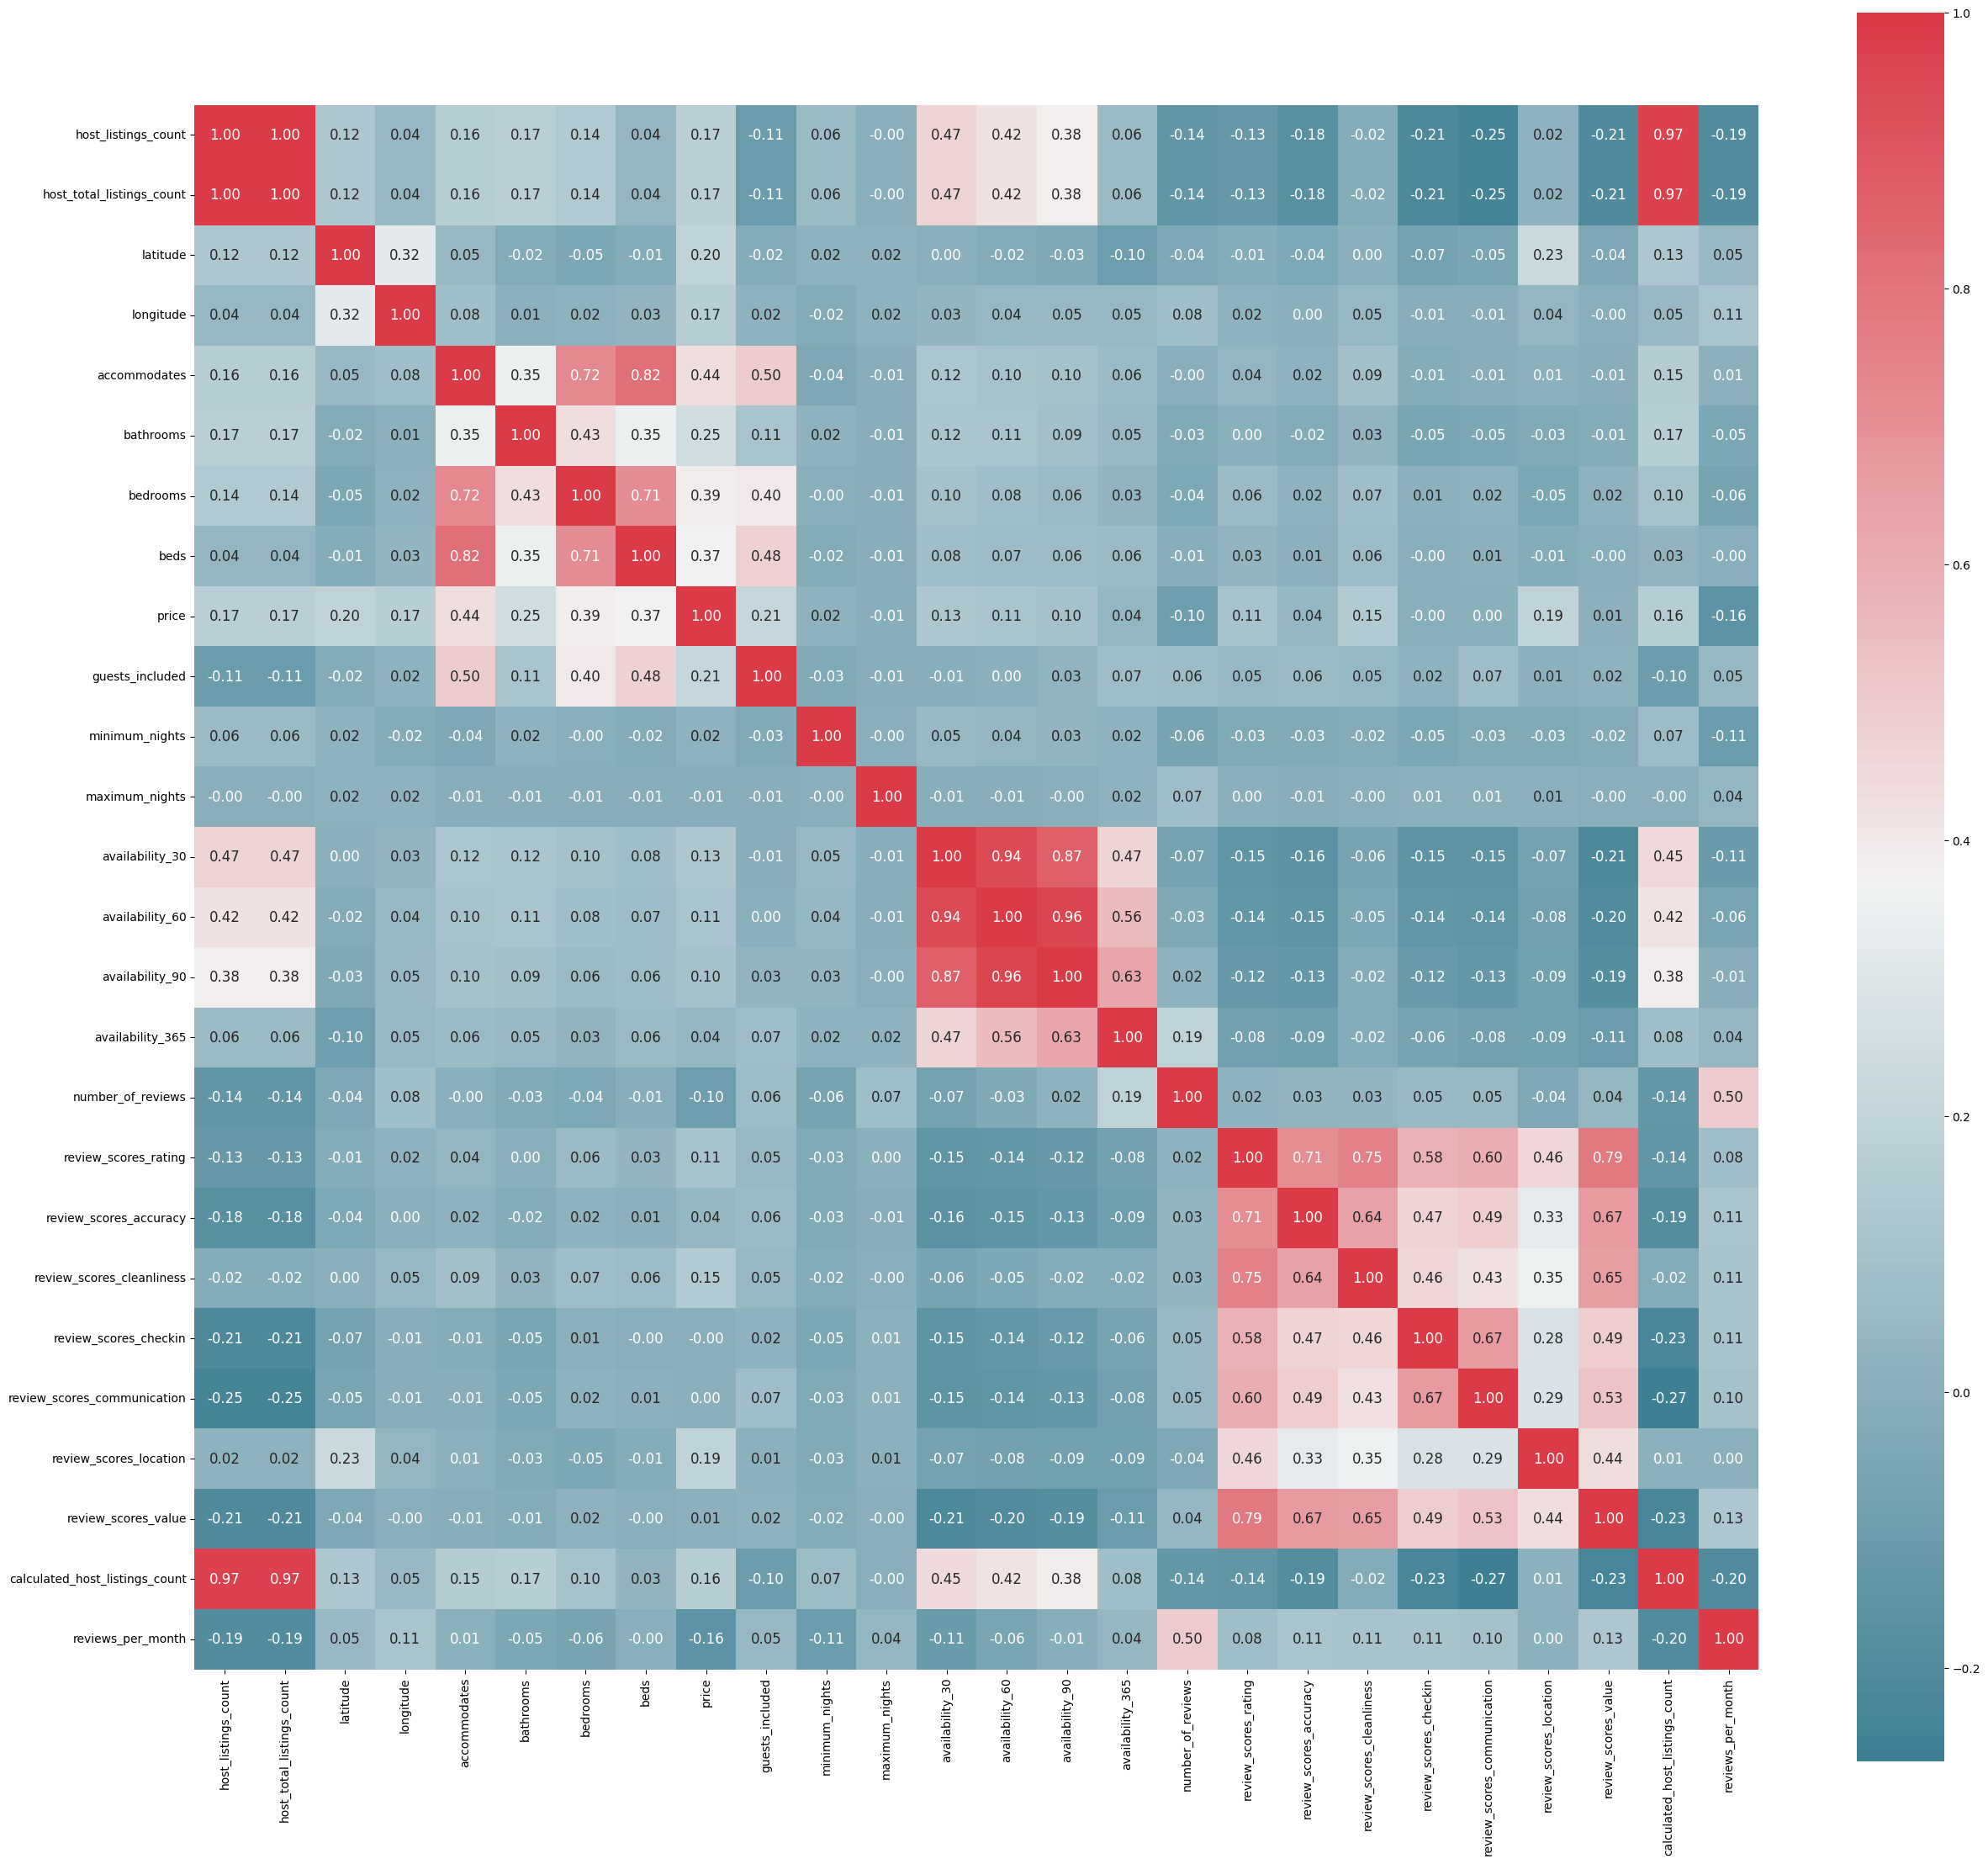

In [15]:
listings_data_boston[['price']] = listings_data_boston[['price']].replace('[\$,]', '', regex=True).astype(float)
plot_correlation_map(listings_data_boston[listings_data_boston.select_dtypes(include=['float64', 'int64', 'bool']).columns].drop(['id', 'scrape_id', 'host_id'], axis=1))

## Categorizing Airbnb types

### Let's look through them and choose which ones would be most effective
Some of them are no brainers such as Property type room_type and bed_type, since they will affect the tenant directly


In [16]:
def categorize_column(df, column_names):
    """
    Categories a column in the DataFrame and returns the modified DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.
    column_name (str): Name of the column to be categorized.

    Returns:
    DataFrame: Modified DataFrame with the column categorized.
    """
    
    for column_name in column_names:
        df[column_name] = df[column_name].fillna('Unknown')
        df = pd.concat([df.drop(column_name, axis=1), pd.get_dummies(df[column_name], prefix='property_type', columns=df[column_name].unique())], axis=1)
        
    return df



In [17]:
listings_data_seattle = categorize_column(listings_data_seattle, ['property_type', 'room_type'])
listings_data_boston = categorize_column(listings_data_boston, ['property_type', 'room_type'])

In [29]:
calender_data_seattle['price'] = calender_data_seattle['price'].replace('[\$,]', '', regex=True).astype(float)
calender_data_boston['price'] = calender_data_boston['price'].replace('[\$,]', '', regex=True).astype(float)

# Data Modeling

### Visualizing Data
#### Let's find some answers to our questions

### How can a tenant Make use of this information?

By finding the average price per property type + number of accomadations, he can choose wisely and pick a better living place

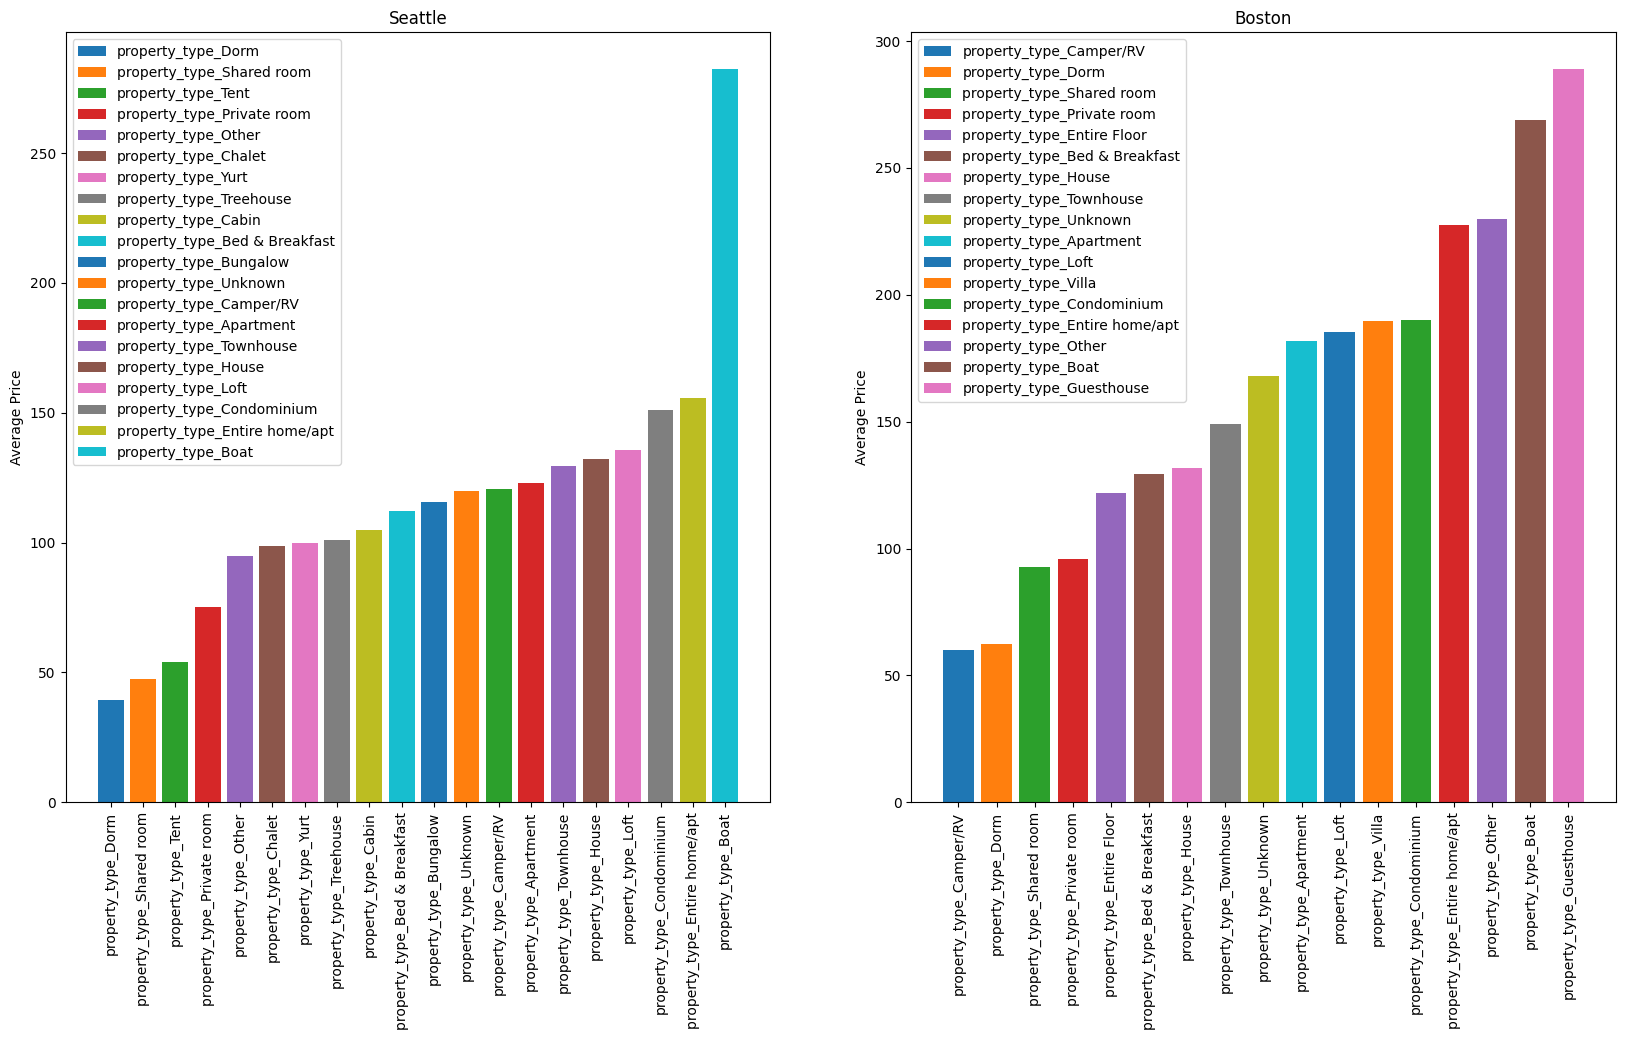

In [30]:
#Finding average price for each property type in Seattle and Boston
def avg_price_per_property_type(df_listing1, df_listing2):
    """
    Plot the average price per property type for two cities.

    Parameters:
    df_listing1 (DataFrame): Listings DataFrame for city 1.
    df_listing2 (DataFrame): Listings DataFrame for city 2.

    Returns:
    dict: Average price per property type for city 1.
    dict: Average price per property type for city 2.
    
    """

    #Count each property type in city 1
    seattle_avg_price = {}
    for column in [column for column in df_listing1.columns if 'property_type' in column]:
        seattle_avg_price[column] = df_listing1[df_listing1[column] == 1]['price'].mean()
    
    #Count each property type in city 2
    boston_avg_price = {}
    for column in [column for column in df_listing2.columns if 'property_type' in column]:
        boston_avg_price[column] = df_listing2[df_listing2[column] == 1]['price'].mean()


    #Sort the dictionary by value
    seattle_avg_price = dict(sorted(seattle_avg_price.items(), key=lambda item: item[1]))
    boston_avg_price = dict(sorted(boston_avg_price.items(), key=lambda item: item[1]))


    
    #Plot each property availability percentage where x axis is the property type and y axis is the availability percentage

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    for key, value in seattle_avg_price.items():
        ax[0].bar(key, value, label=key)
    ax[0].set_title('Seattle')
    ax[0].set_ylabel('Average Price')
    ax[0].xaxis.set_tick_params(rotation=90)
    ax[0].legend()
    for key, value in boston_avg_price.items():
        ax[1].bar(key, value, label=key)
    ax[1].set_title('Boston')
    ax[1].set_ylabel('Average Price')
    ax[1].xaxis.set_tick_params(rotation=90)
    ax[1].legend()
    plt.show()

    seattle_avg_price = pd.DataFrame(list(seattle_avg_price.items()), columns=['property_type', 'avg_price'])
    boston_avg_price = pd.DataFrame(list(boston_avg_price.items()), columns=['property_type', 'avg_price'])

    return seattle_avg_price, boston_avg_price

seattle_avg_price, boston_avg_price = avg_price_per_property_type(listings_data_seattle, listings_data_boston)

In [20]:
seattle_avg_price

,property_type,avg_price
0,property_type_Dorm,39.500000
1,property_type_Shared room,47.547009
2,property_type_Tent,54.000000
3,property_type_Private room,75.044828
4,property_type_Other,94.681818
5,property_type_Chalet,98.500000
6,property_type_Yurt,100.000000
7,property_type_Treehouse,101.000000
8,property_type_Cabin,104.666667
9,property_type_Bed & Breakfast,112.054054


In [21]:
boston_avg_price

,property_type,avg_price
0,property_type_Camper/RV,60.000000
1,property_type_Dorm,62.500000
2,property_type_Shared room,92.762500
3,property_type_Private room,96.041364
4,property_type_Entire Floor,122.000000
5,property_type_Bed & Breakfast,129.365854
6,property_type_House,131.599644
7,property_type_Townhouse,149.037037
8,property_type_Unknown,168.000000
9,property_type_Apartment,181.966692


### How will an airbnb host choose the proper property type to rent?

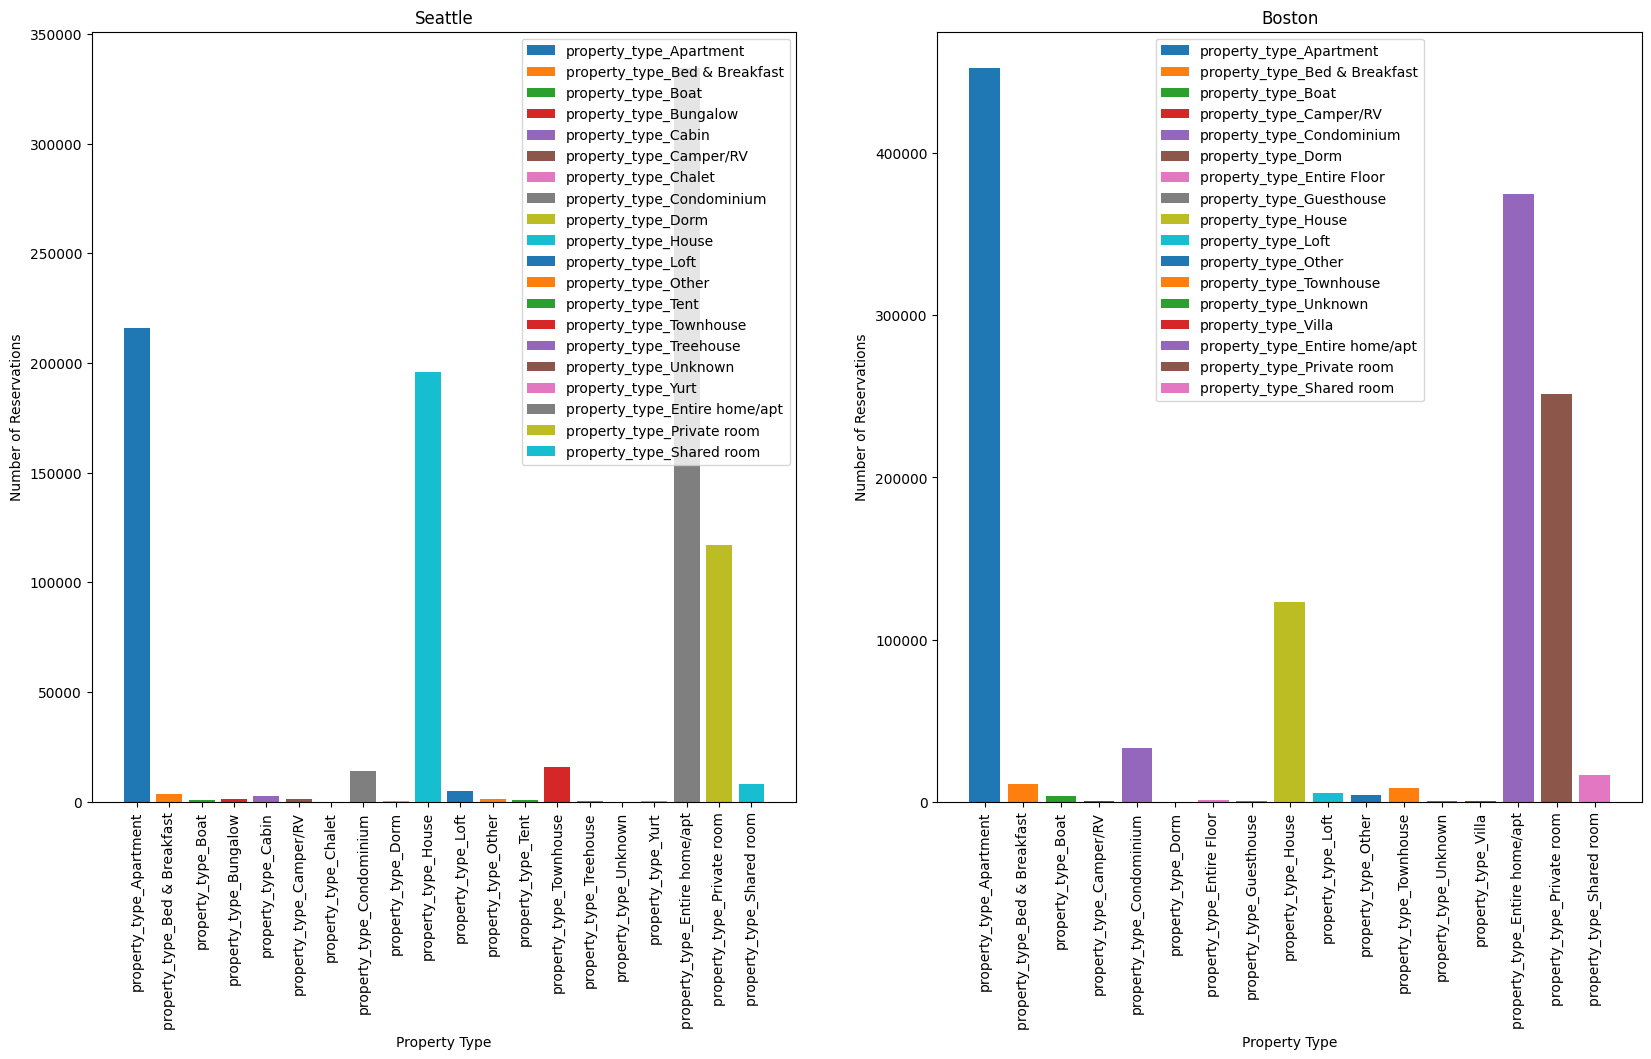

In [38]:
# Do people in boston and seattle have different preferences for property type?
def property_type_preference(df_listing1, df_listing2, df_calendar1, df_calendar2):
    """
    Plot the property type preference for two cities.

    Parameters:
    df_listing1 (DataFrame): Input DataFrame for city 1.
    df_listing2 (DataFrame): Input DataFrame for city 2.
    df_calendar1 (DataFrame): Input DataFrame for city 1.
    df_calendar2 (DataFrame): Input DataFrame for city 2.

    Returns:
    dict: Property type preference for city 1.
    dict: Property type preference for city 2.
    
    """
    
    df_calendar1['available'] = df_calendar1['available'].replace({'t': 'Available', 'f': 'Reserved'})
    df_calendar2['available'] = df_calendar2['available'].replace({'t': 'Available', 'f': 'Reserved'})

    property_columns_city1 = [column for column in df_listing1.columns if column.startswith('property_type')]
    seattle_availablity = {}
    for column in property_columns_city1:
       seattle_availablity[column] = df_calendar1[df_calendar1['listing_id'].isin(df_listing1[df_listing1[column] == 1]['id'])]['available'].value_counts() 
    
    property_columns_city2 = [column for column in df_listing2.columns if column.startswith('property_type')]
    boston_availablity = {}
    for column in property_columns_city2:
        boston_availablity[column] = df_calendar2[df_calendar2['listing_id'].isin(df_listing2[df_listing2[column] == 1]['id'])]['available'].value_counts() 
           
    #Plot each property availability percentage where x axis is the property type and y axis is the availability percentage
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    for key, value in seattle_availablity.items():
        ax[0].bar(key, value['Reserved'], label=key)
    ax[0].set_title('Seattle')
    ax[0].set_xlabel('Property Type')
    ax[0].set_ylabel('Number of Reservations')
    ax[0].xaxis.set_tick_params(rotation=90)
    ax[0].legend()
    for key, value in boston_availablity.items():
        ax[1].bar(key, value['Available'], label=key)
    ax[1].set_title('Boston')
    ax[1].set_xlabel('Property Type')
    ax[1].set_ylabel('Number of Reservations')
    ax[1].xaxis.set_tick_params(rotation=90)
    ax[1].legend()
    plt.show()
    
    return seattle_availablity, boston_availablity
    

seattle_availability, boston_availability = property_type_preference(listings_data_seattle, listings_data_boston, calender_data_seattle, calender_data_boston)


### From What we can see, Houses have the most number of reservations... But there is more to it than that, Let's check the total Number of listing for houses and compare using percentages!

In [23]:
#Percentages of reservation for each listing
def  reservation_percentage(seattle_availability, boston_availability):
    seattle_reserved_percentages = {}
    for key, value in seattle_availability.items():
        seattle_reserved_percentages[key] = value['Reserved'] / (value['Reserved'] + value['Available']) * 100

    boston_reserved_percentages = {}
    for key, value in boston_availability.items():
        boston_reserved_percentages[key] = value['Reserved'] / (value['Reserved'] + value['Available']) * 100

    #Sorting each dictionary by value
    seattle_reserved_percentages = dict(sorted(seattle_reserved_percentages.items(), key=lambda item: item[1], reverse=True))
    boston_reserved_percentages = dict(sorted(boston_reserved_percentages.items(), key=lambda item: item[1], reverse=True))
    return seattle_reserved_percentages, boston_reserved_percentages

seattle_reserved_percentages, boston_reserved_percentages = reservation_percentage(seattle_availability, boston_availability)

### Major differences between Boston and Seattle

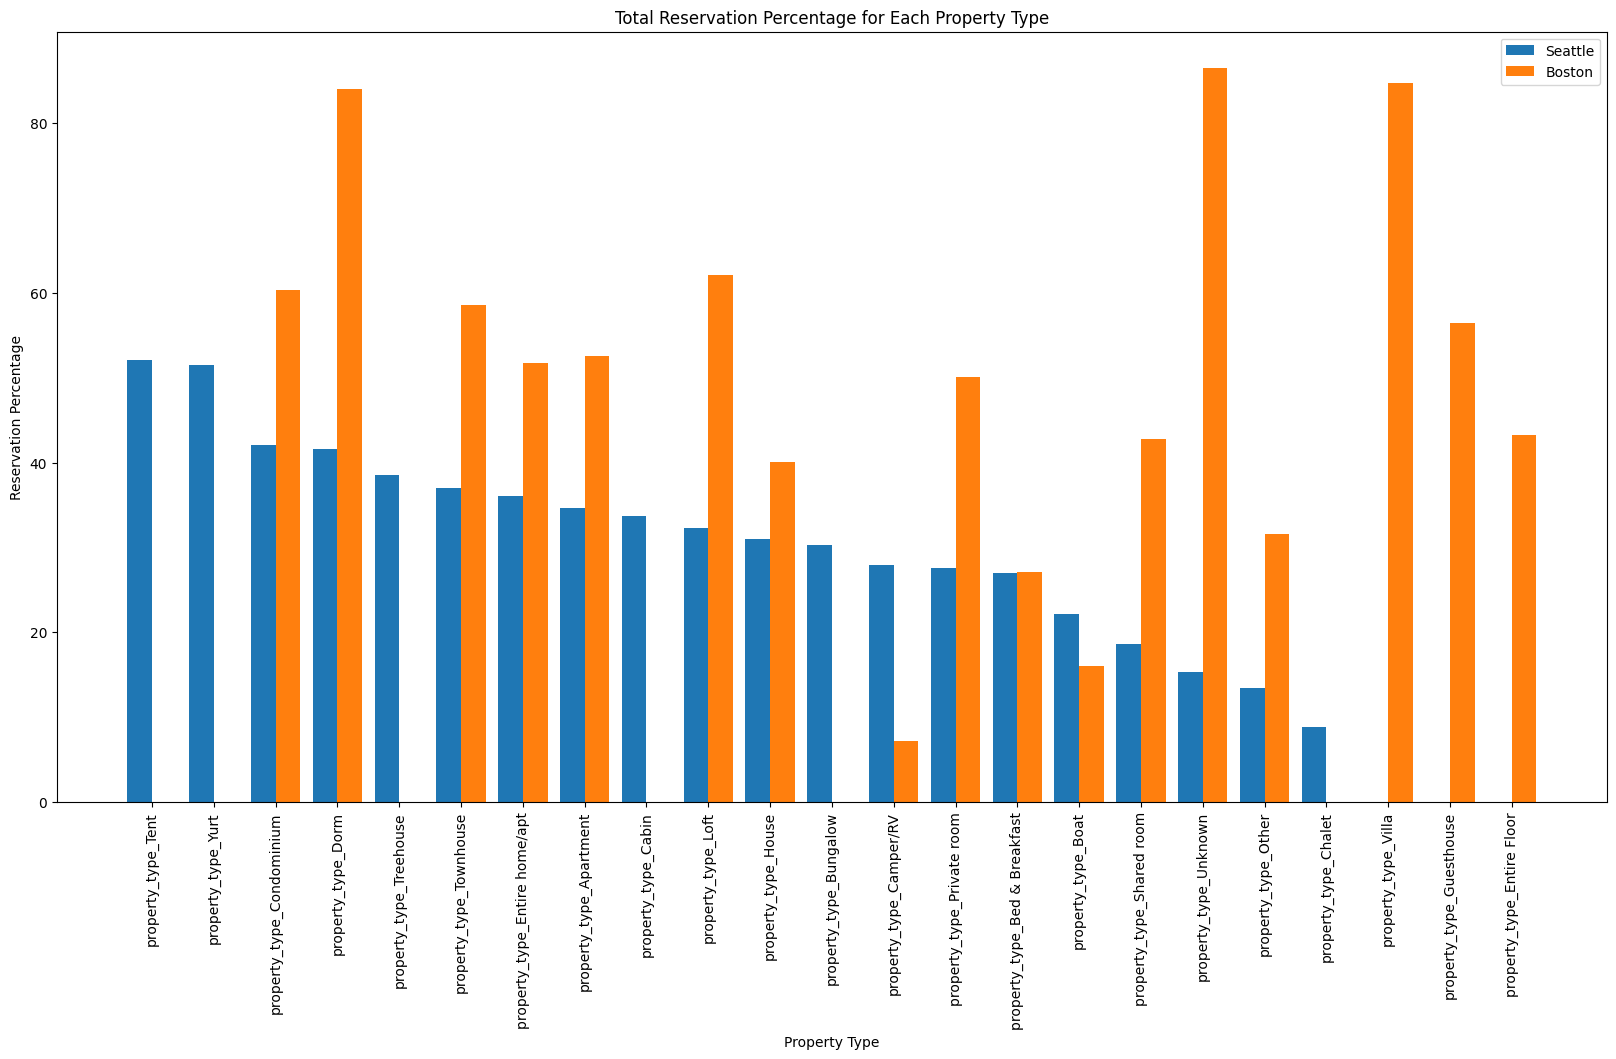

In [37]:
#Plot each property availability percentage where x axis is the property type and y axis is the availability percentage and having both in one histogram
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(seattle_reserved_percentages.keys(), seattle_reserved_percentages.values(), label='Seattle', width=-0.4, align='edge' )
ax.bar(boston_reserved_percentages.keys(), boston_reserved_percentages.values(), label='Boston', width=0.4, align='edge')
ax.set_title('Total Reservation Percentage for Each Property Type')
ax.set_xlabel('Property Type')
ax.set_ylabel('Reservation Percentage')
ax.xaxis.set_tick_params(rotation=90)
ax.legend()
plt.show()

### When Looking at the Apartment, We can see that, Even though it has the highest number of reservations, the number of listings is much larger, therefore it is not a good option for a new airbnb host But, Let's look deeper into it.

# Evaluation

In [25]:
#Remove outliers
def remove_outliers(df, column, threshold=3):
    """
    Remove outliers from a DataFrame based on the Z-score of a column.
    
    Parameters:
        df (DataFrame): Input DataFrame.
        column (str): Name of the column to remove outliers from.
        threshold (int): Z-score threshold for outlier detection. Default is 3.
        
    Returns:
        DataFrame: DataFrame with outliers removed from the specified column.
    """
    # Calculate the Z-score of the column
    print(df[column].shape)
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    
    # Filter out rows where the absolute Z-score exceeds the threshold
    df_filtered = df.loc[abs(z_scores) < threshold]
    
    return df_filtered

In [26]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Compute evaluation metrics for a trained model.

    Parameters:
    model : object
        Trained model.
    X_train : array-like or DataFrame
        Features or independent variables for training.
    X_test : array-like or DataFrame
        Features or independent variables for testing.
    y_train : array-like or Series
        Target variable or dependent variable for training.
    y_test : array-like or Series
        Target variable or dependent variable for testing.

    Returns:
    tuple
        Evaluation metrics (MSE_train, MSE_test, R2_train, R2_test, score_train, score_test).
    """
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    return MSE_train, MSE_test, R2_train, R2_test, score_train, score_test

## Predicting Price for Seattle

In [27]:
#Splitting seattle the data into training and testing
X = listings_data_seattle[listings_data_seattle.select_dtypes
                          (include=['float64', 'int64', 'bool']).columns].drop(['id', 'scrape_id', 'host_id', 'latitude','longitude','host_listings_count'], axis=1)
X = remove_outliers(X, 'price')
X = X.dropna()
y = X[['price']]
X = X.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Training and Evaluating model
mse_train, mse_test, r2_train, r2_test, score_train, score_test = evaluate_model(model, X_train, X_test, y_train, y_test)

print('Model Performance')
print('Train MSE:  ', mse_train, 'Test MSE:  ', mse_test)
print('Train R2:   ', r2_train,  'Test R2:   ', r2_test)
print('Train Score:', score_train, 'Test Score:', score_test)


(3818,)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Model Performance
Train MSE:   1016.83426848488 Test MSE:   1541.0654289579177
Train R2:    0.7521127943405229 Test R2:    0.6547453795117679
Train Score: 0.7521127943405229 Test Score: 0.6547453795117679


## Predicting price for Boston

In [31]:
#Splitting the data into training and testing
X = listings_data_boston[listings_data_boston.select_dtypes
                          (include=['float64', 'int64', 'bool']).columns].drop(['id', 'scrape_id', 'host_id', 'latitude','longitude','host_listings_count'], axis=1)
X = remove_outliers(X, 'price')
X = X.dropna()
y = X[['price']]
X = X.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

#Training and Evaluating model
mse_train, mse_test, r2_train, r2_test, score_train, score_test = evaluate_model(model, X_train, X_test, y_train, y_test)

print('Model Performance')
print('Train MSE:  ', mse_train, 'Test MSE:  ', mse_test)
print('Train R2:   ', r2_train,  'Test R2:   ', r2_test)
print('Train Score:', score_train, 'Test Score:', score_test)

(3585,)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Model Performance
Train MSE:   2393.7011113973385 Test MSE:   3725.016608406985
Train R2:    0.7500264474156833 Test R2:    0.6476550070813771
Train Score: 0.7500264474156833 Test Score: 0.6476550070813771
